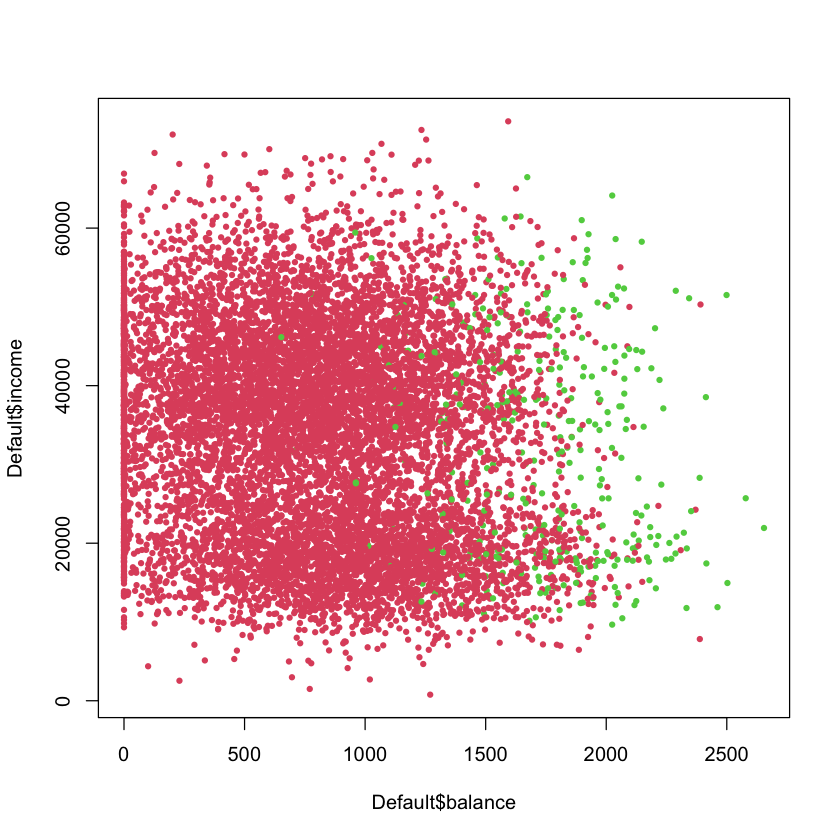

In [ ]:
# =============================================
# Credit data
# =============================================
#
# Summary: 
# A simulated data set containing information on ten 
# thousand customers. The aim here is to predict which 
# customers will default on their credit card debt.
#
# Data description: 
# The data set consists of the following 4 variables
# Response variable:
#  default: has defaulted on the credit card (Yes/No)
# Covariates:
#  income: annual income in dollars
#  balance: average balance that the customer has remaining on the 
#           credit card after making the monthly payment
#  Student: is a student (Yes/No)
#
#======================================================

# reading data
library(ISLR)
data(Default)


# plotting data
default01 <- rep(0, nrow(Default))
default01[Default$defaul == "Yes"] <- 1

par(bg = "white")
plot(Default$balance, Default$income, pch = 16, col = 2 + default01, cex = 0.7)

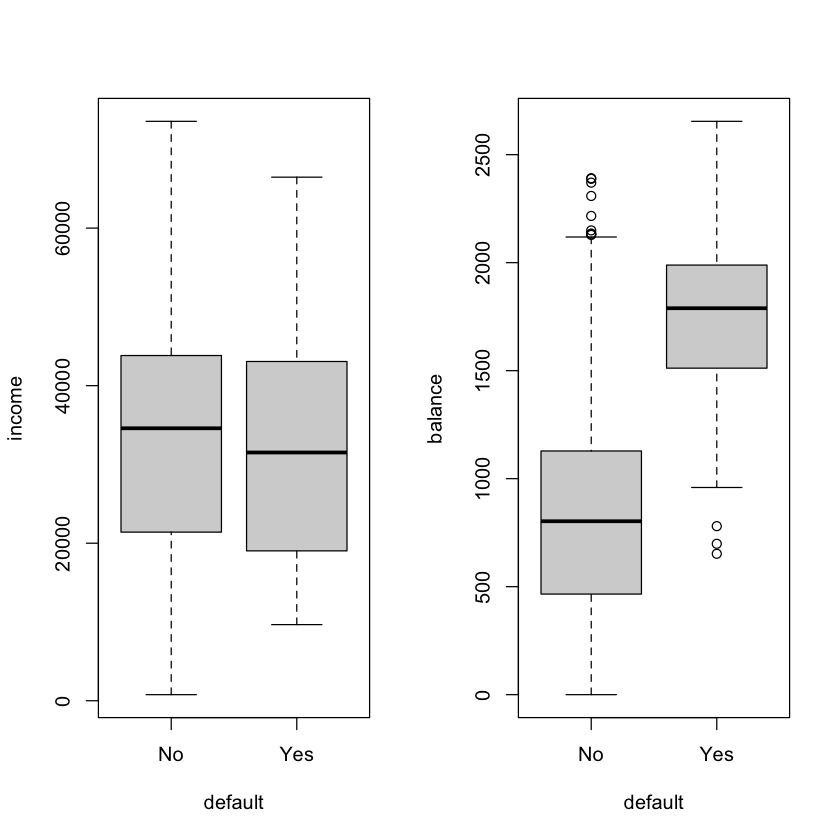

In [10]:
par(mfrow = c(1, 2), bg = "white")
boxplot(income ~ default, data = Default)
boxplot(balance ~ default, data = Default)
par(mfrow = c(1, 1))

In [13]:
# deividing into test and train, making sure class balance is same in both

set.seed(1)
ind1 <- which(Default$defaul == "Yes")
n1 <- length(ind1)
train.ind1 <- sample(ind1, size = ceiling(n1 / 2))
train.ind0 <- sample((1 : nrow(Default))[-ind1], size = ceiling((nrow(Default) - n1) / 2))
Default.train <- Default[c(train.ind1, train.ind0), ]
Default.test <- Default[-c(train.ind1, train.ind0), ]
Default.test$default <- as.numeric(Default.test$default) - 1


In [ ]:
# fitting logistic regression model

fit.logit <- glm(default ~ income + balance + student, family = binomial(link = logit), data = Default.train)
summary(fit.logit)
exp(fit.logit$coef[2 : 4])


Call:
glm(formula = default ~ income + balance + student, family = binomial(link = logit), 
    data = Default.train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.110e+01  6.930e-01 -16.023   <2e-16 ***
income       1.208e-05  1.133e-05   1.066    0.286    
balance      5.641e-03  3.196e-04  17.650   <2e-16 ***
studentYes  -3.699e-01  3.304e-01  -1.120    0.263    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1463.76  on 5000  degrees of freedom
Residual deviance:  790.65  on 4997  degrees of freedom
AIC: 798.65

Number of Fisher Scoring iterations: 8


income    balance studentYes 
 1.0000121  1.0056566  0.6908266

In [16]:
# predicting probabilities for the test set

pred.logit <- predict(fit.logit, newdata = Default.test, type = "response")
y.hat.logit <- as.numeric(pred.logit >= 0.5)

In [20]:
# evaluating performance

AIC(fit.logit)
BIC(fit.logit)
mean(as.numeric(y.hat.logit != Default.test$default)) # 0-1 loss
-2 * mean(Default.test$default * log(pred.logit) + (1 - Default.test$default) * log(1 - pred.logit)) # deviance

[1] 798.6499

[1] 824.7195

[1] 0.02680536

[1] 0.1565196

In [22]:
# fitting LDA model

library(MASS)
fit.lda <- lda(default ~ income + balance + student, data = Default.train, method = "moment") #momentmetoden
print(fit.lda)
fit.lda2 <- lda(default ~ income + balance + student, data = Default.train, method="mle") # MLE
print(fit.lda2)

Call:
lda(default ~ income + balance + student, data = Default.train, 
    method = "moment")

Prior probabilities of groups:
        No        Yes 
0.96660668 0.03339332 

Group means:
      income   balance studentYes
No  33658.97  804.2985  0.2906496
Yes 32011.67 1749.0338  0.3952096

Coefficients of linear discriminants:
                     LD1
income      5.196061e-06
balance     2.240116e-03
studentYes -9.049860e-02
Call:
lda(default ~ income + balance + student, data = Default.train, 
    method = "mle")

Prior probabilities of groups:
        No        Yes 
0.96660668 0.03339332 

Group means:
      income   balance studentYes
No  33658.97  804.2985  0.2906496
Yes 32011.67 1749.0338  0.3952096

Coefficients of linear discriminants:
                     LD1
income      0.0000051971
balance     0.0022405642
studentYes -0.0905167026


In [23]:
# predicting probabilities for the test set

pred.obj <- predict(fit.lda, newdata = Default.test)
pred.lda <- pred.obj$posterior[, 2]
y.hat.lda <- as.numeric(pred.obj$class) - 1

In [ ]:
# evaluating performance

pred.obj.train <- predict(fit.lda, nedata = Default.train)
pred.train <- pred.obj.train$posterior[, 2]

# AIC
-2 * sum((as.numeric(Default.train$default) -1) * log(pred.train) + (1 - (as.numeric(Default.train$default) - 1)) * log(1 - pred.train)) + log(nrow(Default.train)) * (2 + 2*3 + 6)
mean(as.numeric(y.hat.lda != Default.test$default)) # 0-1 loss
-2 * mean(Default.test$default * log(pred.lda) + (1 - Default.test$default) * log(1 - pred.lda)) #deviance
# BIC

[1] 919.7973

[1] 0.02740548

[1] 0.1591095

In [28]:
# fitting QDA-model

fit.qda <- qda(default ~ income + balance + student, data = Default.train, method = "moment") # momentmetoden
print(fit.qda)
fit.qda2 <- qda(default ~ income + balance + student, data = Default.train, method = "mle") # MLE
print(fit.qda2)

Call:
qda(default ~ income + balance + student, data = Default.train, 
    method = "moment")

Prior probabilities of groups:
        No        Yes 
0.96660668 0.03339332 

Group means:
      income   balance studentYes
No  33658.97  804.2985  0.2906496
Yes 32011.67 1749.0338  0.3952096
Call:
qda(default ~ income + balance + student, data = Default.train, 
    method = "mle")

Prior probabilities of groups:
        No        Yes 
0.96660668 0.03339332 

Group means:
      income   balance studentYes
No  33658.97  804.2985  0.2906496
Yes 32011.67 1749.0338  0.3952096


In [ ]:
# predicting probabilities for the test set

pred.obj <- predict(fit.qda, newdata = Default.test)
pred.qda <- pred.obj$posterior[, 2] # predicted probabilities
y.hat.qda <- as.numeric(pred.obj$class) - 1

# evaluating performance
pred.obj.train <- predict(fit.qda, newdata = Default.train)
pred.train <- pred.obj.train$posterior[, 2]

# AIC
-2 * sum((as.numeric(Default.train$default) - 1) * log(pred.train) + (1 - (as.numeric(Default.train$default) - 1)) * log(1 - pred.train)) + 2 * (2 + 2 * 2 + 2 * 6)

# BIC
-2 * sum((as.numeric(Default.train$default) - 1) * log(pred.train) + (1 - (as.numeric(Default.train$default) - 1)) * log(1 - pred.train)) + log(nrow(Default.train)) * (2 + 2 * 3 + 2 * 6)
mean(as.numeric(y.hat.lda != Default.test$default)) # 0-1 loss
-2 * mean(Default.test$default * log(pred.lda) + (1 - Default.test$default) * log(1 - pred.lda)) # deviance

[1] 833.7751

[1] 968.123

[1] 0.02740548

[1] 0.1591095

In [31]:
#=======================================================
# Alligator data
#=======================================================
#
# Summary: 
# These are data from a study of factors influencing the primary
# food choice of alligators. 219 alligators in four Florida lakes
# were captured. Then one registered their size and the food type
# that was predominant in volume in the stomachs of these
# alligators. For more details see Delany et al. (1999)
#
# Data description: 
# The data set consists of the following 7 variables
# Response variables:
#  y1: number of alligators having fish as their primary food choice 
#  y2: number of alligators having invertebrate as their primary food choice 
#  y3: number of alligators having reptiles as their primary food choice 
#  y4: number of alligators having birds as their primary food choice 
#  y5: number of alligators having other types as their primary food choice 
# Covariates:
#  lake: lake where the alligator was captured (1=Hancock, 2=Ocklawaha, 
#        3=Trafford, 4=George)
#  size: indicator of whether the alligator was smaller or larger than 2.3m
#
#=======================================================

# reading alligator data from the web
alligators = read.table("http://www.stat.ufl.edu/~aa/glm/data/Alligators.dat", header = TRUE)
alligators

lake,size,y1,y2,y3,y4,y5
<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,23,4,2,2,8
1,0,7,0,1,3,5
2,1,5,11,1,0,3
2,0,13,8,6,1,0
3,1,5,11,2,1,5
3,0,8,7,6,3,5
4,1,16,19,1,2,3
4,0,17,1,0,1,3


In [ ]:
# fitting the model
install.packages('VGAM')
library(VGAM)


# fitting a baseline category logit model with size and lake as
# main effects and fish(y1) as reference category
fit.main = vglm(cbind(y2, y3, y4, y5, y1) ~ factor(size) + factor(lake),
              family = multinomial, dat = alligators)
              
summary(fit.main)



The downloaded binary packages are in
	/var/folders/dp/x5lf9lp142l0p7rp61v608h00000gn/T//RtmpkU97iI/downloaded_packages


Loading required package: stats4

Loading required package: splines




Call:
vglm(formula = cbind(y2, y3, y4, y5, y1) ~ factor(size) + factor(lake), 
    family = multinomial, data = alligators)

Coefficients: 
                Estimate Std. Error z value Pr(>|z|)    
(Intercept):1    -3.2074     0.6387  -5.021 5.13e-07 ***
(Intercept):2    -2.0718     0.7067  -2.931 0.003373 ** 
(Intercept):3    -1.3980     0.6085  -2.297 0.021601 *  
(Intercept):4    -1.0781     0.4709  -2.289 0.022061 *  
factor(size)1:1   1.4582     0.3959   3.683 0.000231 ***
factor(size)1:2  -0.3513     0.5800  -0.606 0.544786    
factor(size)1:3  -0.6307     0.6425  -0.982 0.326296    
factor(size)1:4   0.3316     0.4482   0.740 0.459506    
factor(lake)2:1   2.5956     0.6597   3.934 8.34e-05 ***
factor(lake)2:2   1.2161     0.7860   1.547 0.121824    
factor(lake)2:3  -1.3483     1.1635  -1.159 0.246529    
factor(lake)2:4  -0.8205     0.7296  -1.125 0.260713    
factor(lake)3:1   2.7803     0.6712   4.142 3.44e-05 ***
factor(lake)3:2   1.6925     0.7804   2.169 0.030113 *  
fact